In [109]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model

In [110]:
# Define the broken power law function that will become our model function
def broken_power_law(f, A, f0, alpha, beta):
    y = np.piecewise(f, [f < f0, f >= f0],
                     [lambda f: A * (f/f0)**alpha, lambda f: A * (f/f0)**beta])
    return y

In [111]:
# Generate simulated supernova light curve data
f_data = np.logspace(0, 3, 100)
A_true = 1.0
f0_true = 300.0
alpha_true = 2.5
beta_true = -0.8
y_true = broken_power_law(f_data, A_true, f0_true, alpha_true, beta_true)
y_data = y_true + np.random.normal(size=len(f_data), scale=0.2)  # inject noise

In [112]:
# Define the model using lmfit -- automatically constructs a residual function
model = Model(broken_power_law)
params = model.make_params(A=1, f0=50, alpha=2, beta=-1)

In [113]:
# Perform the fitting
result = model.fit(y_data, params, f=f_data)

In [114]:
# Print the fitting results
print(result.fit_report())

[[Model]]
    Model(broken_power_law)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 83
    # data points      = 100
    # variables        = 4
    chi-square         = 3.68532081
    reduced chi-square = 0.03838876
    Akaike info crit   = -322.081261
    Bayesian info crit = -311.660580
    R-squared          = 0.69880087
[[Variables]]
    A:      1.01634924 +/- 0.10119596 (9.96%) (init = 1)
    f0:     307.402363 +/- 17.6377064 (5.74%) (init = 50)
    alpha:  2.50941085 +/- 0.53726470 (21.41%) (init = 2)
    beta:  -0.74851406 +/- 0.22037317 (29.44%) (init = -1)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, beta)   = -0.7757
    C(f0, beta)  = -0.5366
    C(f0, alpha) = -0.4975
    C(A, f0)     = +0.3712
    C(A, alpha)  = +0.2146


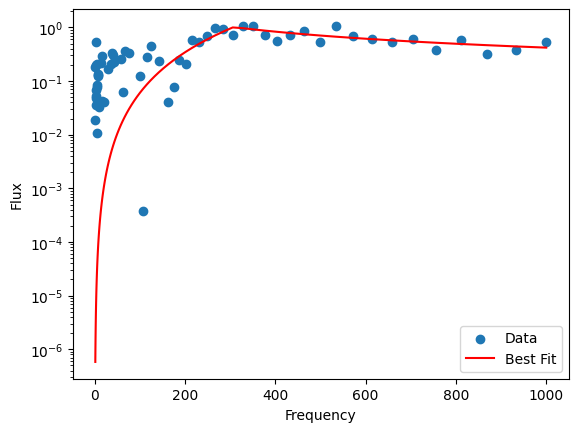

In [115]:
# Plot the data and fitted curve
plt.scatter(f_data, y_data, label='Data')
plt.plot(f_data, result.best_fit, 'r-', label='Best Fit')
plt.yscale('log')
plt.xlabel('Frequency')
plt.ylabel('Flux')
plt.legend()
plt.show()